### EDA variables TAS, TAD, PP, colesterol y diabetes

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../data/data_limpia.csv')

#### Valoración de variables individuales: Presión arterial, numérica contínua

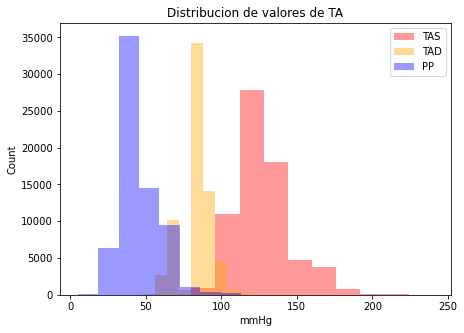

In [26]:
plt.figure(figsize=(7,5))
plt.title('Distribucion de valores de TA')
sns.distplot(data.TAS, bins=10, kde=False, color='red')
sns.distplot(data.TAD, bins=10, kde=False, color='orange')
sns.distplot(data.PP, bins=10, kde=False, color='blue')
plt.xlabel('mmHg'), plt.ylabel('Count')
plt.legend(['TAS','TAD','PP'])

# Distribuciones similar a normal

#### Valoración de variables individuales: Colesterol, categorica

(0.0, 100.0, 0.0, 100.0)

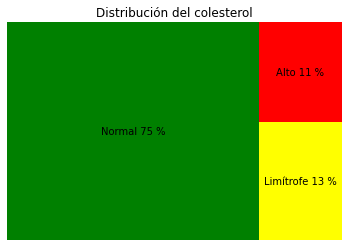

In [76]:
import squarify
col_count = list(data.cholesterol.value_counts())
col_labels = ['Normal', 'Limítrofe','Alto']
col_precent = list((data.cholesterol.value_counts(1)*100).round(0))
gen_label = zip(col_labels,col_precent)
labels =[str(l+' '+str(int(p))+' %') for l,p in gen_label]

squarify.plot(sizes=col_count, label=labels, color=['green','yellow','red'])
plt.title('Distribución del colesterol')
plt.axis('off')

#### Valoración de variables individuales: Glucemia, categorica

(0.0, 100.0, 0.0, 100.0)

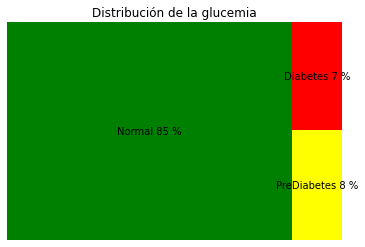

In [75]:
import squarify
col_count = list(data.gluc.value_counts())
col_labels = ['Normal', 'PreDiabetes','Diabetes']
col_precent = list((data.gluc.value_counts(1)*100).round(0))
gen_label = zip(col_labels,col_precent)
labels =[str(l+' '+str(int(p))+' %') for l,p in gen_label]

squarify.plot(sizes=col_count, label=labels, color=['green','yellow','red'])
plt.title('Distribución de la glucemia')
plt.axis('off')

#### Relación edad - presion arterial

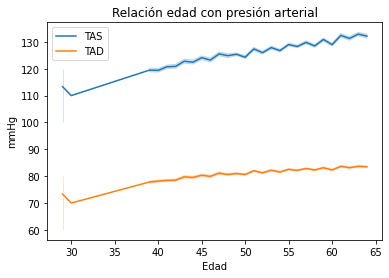

In [96]:

sns.lineplot(data=data,x='AgeinYr',y='TAS')
sns.lineplot(data=data,x='AgeinYr',y='TAD')
plt.title('Relación edad con presión arterial')
plt.xlabel('Edad')
plt.ylabel('mmHg')
plt.legend(['TAS','TAD'])


Text(0.5, 1.0, 'TAS con edad y género')

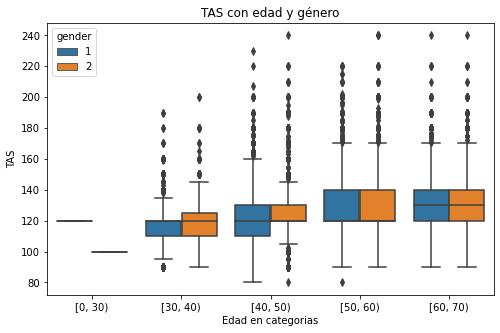

In [19]:
my_order = data.groupby('AgeCat')['TAS'].max().index
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='AgeCat', y='TAS',order=my_order, hue='gender')
#sns.violinplot(data=data, x='AgeCat', y='TAS', order=my_order, hue='gender')
plt.xlabel('Edad en categorias')
plt.ylabel('TAS')
plt.title('TAS con edad y género')


Text(0.5, 1.0, 'TAD con edad y género')

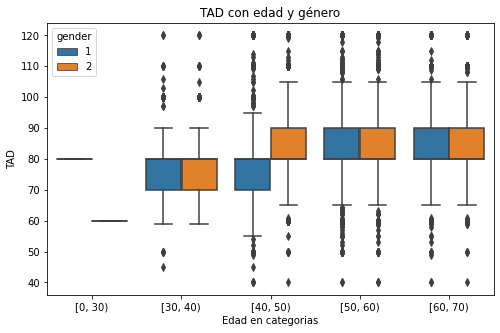

In [20]:
my_order2 = data.groupby('AgeCat')['TAD'].max().index
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='AgeCat', y='TAD', order=my_order, hue='gender')
plt.xlabel('Edad en categorias')
plt.ylabel('TAD')
plt.title('TAD con edad y género')


##### in1: La TA aumenta con la edad, sin diferencias entre género excepto en el subgrupo 40-50 años; podria relacionarse con la entrada en la menopausia.
##### NOTA: si 1 es masculino, esperaríamos que en el grupo 40-50 los hombre tengan mas TA que las mujeres y se muestra al revés

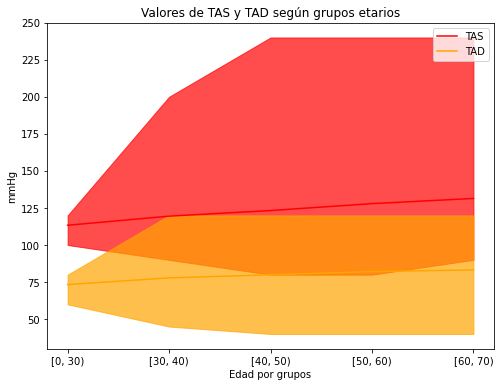

In [21]:
plt.figure(figsize=(8,6))
x_age = list(data.groupby('AgeCat')['TAS'].max().index)
TAS_max = list(data.groupby('AgeCat')['TAS'].max())
TAS_mean = list(data.groupby('AgeCat')['TAS'].mean())
TAS_min = list(data.groupby('AgeCat')['TAS'].min())
TAD_max =list(data.groupby('AgeCat')['TAD'].max())
TAD_mean =list(data.groupby('AgeCat')['TAD'].mean())
TAD_min =list(data.groupby('AgeCat')['TAD'].min())
PP_max = list(data.groupby('AgeCat')['PP'].max())
PP_min = list(data.groupby('AgeCat')['PP'].min())

plt.fill_between(x_age, TAS_max, TAS_min, color='red', alpha=0.7)
plt.plot(x_age,TAS_mean, color='red')
plt.fill_between(x_age, TAD_max, TAD_min, color='orange', alpha=0.7)
plt.plot(x_age,TAD_mean, color='orange')
plt.title('Valores de TAS y TAD según grupos etarios')
plt.xlabel('Edad por grupos')
plt.ylabel('mmHg')
plt.legend(['TAS','TAD'])

#plt.fill_between(x_age, PP_max, PP_min, color='yellow', alpha=0.4)

#### Relación BMI con Colesterol

Text(0.5, 1.0, 'Colesterol y BMI')

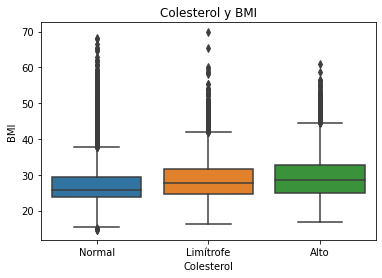

In [114]:
sns.boxplot(data=data, x='cholesterol', y='bmi')
plt.xlabel('Colesterol')
plt.xticks([0,1,2],['Normal','Limítrofe','Alto'])
plt.ylabel('BMI')
plt.title('Colesterol y BMI')

##### in2: El colesterol aumenta en relacion al bmi

#### Relación BMI con Glucemia

Text(0.5, 1.0, 'Niveles de colesterol en relación al grado de Diabetes')

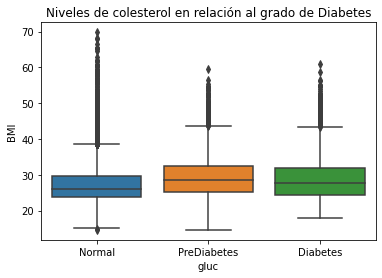

In [115]:
sns.boxplot(data=data, x='gluc', y='bmi')
plt.xticks([0,1,2],['Normal', 'PreDiabetes','Diabetes'])
plt.ylabel('BMI')
plt.title('Niveles de colesterol en relación al grado de Diabetes')

##### in3: la diabetes y prediabetes es mas frecuente con mayor bmi

([<matplotlib.axis.XTick at 0x7f428a786b80>,
 [Text(0, 0, 'Normal'), Text(1, 0, 'PreDiabetes'), Text(2, 0, 'Diabetes')])

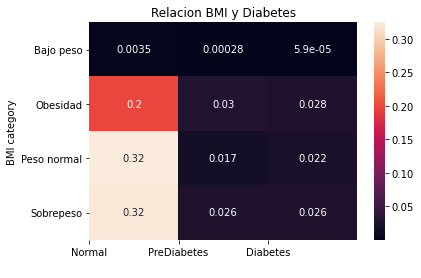

In [4]:
sns.heatmap(pd.crosstab(data.bmi_cat, data.gluc, normalize='all'), annot=True)
plt.title('Relacion BMI y Diabetes')
plt.ylabel('BMI category'), plt.xlabel(' ')
plt.xticks([0,1,2],['Normal', 'PreDiabetes','Diabetes'])



##### in4: Los ptes sin diabetes suelen tener bmi normal o sobrepeso; pero los que tienen diabetes en este dataset se distribuyen parejo entre  las categorias de bmi, excepto Bajo Peso, esto se puede deber a que el dataset está muy desbalanceado, con muy pocos casos de diabetes y prediabetes

In [18]:
diab = data.gluc.value_counts()
ratio_DBT = round(diab[1]/(diab[2]+diab[3]),2)
print(f'El ratio entre NoDiabetes:Diabetes es {ratio_DBT}')

El ratio entre NoDiabetes:Diabetes es 5.68


In [111]:
data.groupby('cholesterol')['bmi'].agg(['median','mean'])

,median,mean
cholesterol,,
1,25.82,26.935915
2,27.64,28.513561
3,28.55,29.423756


### Relación de BMI con presión arterial

In [132]:
data.bmi.describe()

count    67353.000000
mean        27.432363
std          5.081098
min         14.580000
25%         23.880000
50%         26.290000
75%         30.080000
max         69.830000
Name: bmi, dtype: float64

<AxesSubplot:xlabel='bmi', ylabel='TAS'>

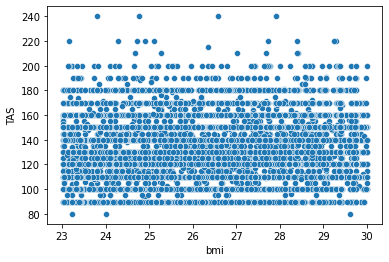

In [135]:
# Realicé el análisis tomando los valores en el IQ 25-75%, dejando afuera los valores outliers
subdata = data[(data.bmi>=23)&(data.bmi<=30)]
sns.scatterplot(data=subdata, x='bmi', y ='TAS')

<AxesSubplot:xlabel='bmi', ylabel='TAD'>

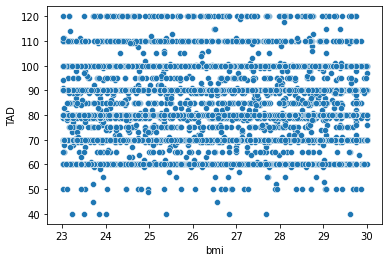

In [136]:
subdata = data[(data.bmi>=23)&(data.bmi<=30)]
sns.scatterplot(data=subdata, x='bmi', y ='TAD')

##### in5: No hay correlación entre TAS o TAD con el bmi

#### Presión de pulso y Cardio

<AxesSubplot:xlabel='cardio', ylabel='PP'>

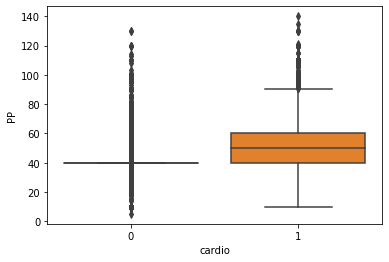

In [23]:
sns.boxplot(data=data, x='cardio', y='PP')

##### in: Hay una clara diferencia entre ambos grupos, ambos tienen similar cantidad de individuos y el grupo sin antec cardiologicos muestra un valor de pp estable en 40mmHg que es lo normal

<AxesSubplot:>

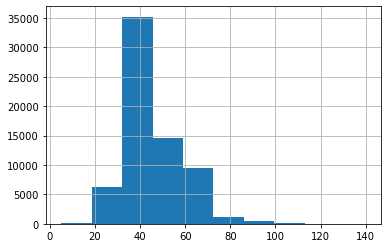

In [14]:
data.PP.hist()

In [15]:
pp_cardio = data.PP[data.cardio ==1]
pp_NOcardio = data.PP[data.cardio ==0]
pp_cardio.describe()

count    33558.000000
mean        49.408973
std         12.832180
min         10.000000
25%         40.000000
50%         50.000000
75%         60.000000
max        140.000000
Name: PP, dtype: float64

In [16]:
pp_NOcardio.describe()

count    33795.000000
mean        41.525743
std          8.868844
min          5.000000
25%         40.000000
50%         40.000000
75%         40.000000
max        130.000000
Name: PP, dtype: float64

Text(0.5, 1.0, 'Distribución de la presión de pulso entre pacientes con o sin antec cardiologicos')

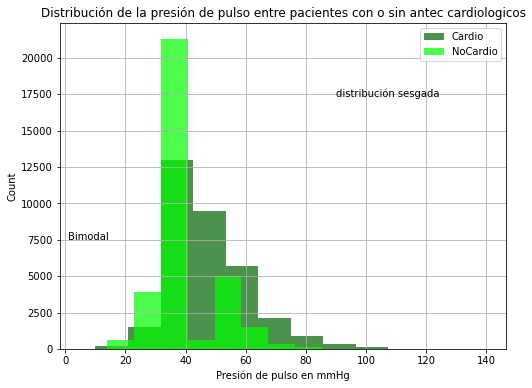

In [22]:
plt.figure(figsize=(8,6))
pp_cardio.hist(alpha=0.7, color='darkgreen', bins=12)
pp_NOcardio.hist(alpha=0.7, color='lime', bins=14)
plt.legend(['Cardio','NoCardio'])
plt.text(90,17300,'distribución sesgada')
plt.text(1,7500,'Bimodal')
plt.xlabel('Presión de pulso en mmHg')
plt.ylabel('Count')
plt.title('Distribución de la presión de pulso entre pacientes con o sin antec cardiologicos')